## Install Dependencies

In [1]:
!pip install -U "transformers==4.40.0" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 72.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [2]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cache

In [3]:
!pip install accelerate

## Download Mistral 7B

In [4]:
import transformers
import torch

model_id = "unsloth/mistral-7b-instruct-v0.3-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:159: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/4.14G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/137k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


## Query Mistral 7B

In [9]:
messages = [
    {"role": "user", "content": "What is the meaning of life?"},
    {"role": "assistant", "content": "The meaning of life is a philosophical and spiritual question that has been pondered for centuries. Many believe it is to seek happiness, knowledge, and personal growth, while others find meaning through faith, relationships, or contributing to the well-being of others. Ultimately, the answer may be unique to each individual."}
]

prompt = pipeline.tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])


 How can I find purpose in my life?

Finding purpose in life can be a personal and sometimes challenging journey. Here are a few steps that may help:

1. Reflect on your values and passions: Consider what matters most to you, what you enjoy doing, and what makes you feel fulfilled.
2. Set goals: Once you have identified your values and passions, set specific, achievable goals that align with them.
3. Take action: Break down your goals into smaller, manageable steps and take action towards achieving them.
4. Seek out new experiences: Try new things, meet new people, and challenge yourself to grow and learn.
5. Find ways to serve others: Helping others can provide a sense of purpose and fulfillment.
6. Practice gratitude: Focus on the positive aspects of your life and be thankful for what you have.
7. Stay open-minded: Be open to new ideas and perspectives, and be willing to adapt and change as you grow and evolve.


In [10]:
messages = [
    {"role": "user", "content": "How can I learn Software Architecture?"},
    {"role": "assistant", "content": "Learning Software Architecture involves several steps:\n1. **Understand the Basics**: Start with the fundamentals of software engineering and computer science.\n2. **Study Design Patterns**: Learn common design patterns and principles.\n3. **Read Books**: Some recommended books include 'Design Patterns: Elements of Reusable Object-Oriented Software' by Erich Gamma, 'Clean Architecture' by Robert C. Martin, and 'Software Architecture in Practice' by Len Bass.\n4. **Online Courses**: Enroll in online courses on platforms like Coursera, Udacity, or edX.\n5. **Practical Experience**: Work on real projects and apply architectural principles.\n6. **Join Communities**: Participate in software architecture communities and forums to learn from others.\n7. **Continuous Learning**: Stay updated with the latest trends and technologies in software architecture."}
]

prompt = pipeline.tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

 How can I learn more about Design Patterns in Software Architecture?

To learn more about design patterns in software architecture, follow these steps:

1. **Understand the Basics**: Familiarize yourself with the basic concepts of object-oriented programming (OOP) and software design.
2. **Study Design Patterns**: Learn about the most common design patterns such as Creational, Structural, and Behavioral patterns.
3. **Books**: Read books like 'Design Patterns: Elements of Reusable Object-Oriented Software' by Erich Gamma, Richard Helm, Ralph Johnson, and John Vlissides.
4. **Online Courses**: Enroll in online courses on platforms like Coursera, Udemy, or edX that focus on design patterns.
5. **Practical Experience**: Apply design patterns to real-world projects to gain a deeper understanding of their use.
6. **Coding Exercises**: Implement the design patterns in code to reinforce your learning.
7. **Communities**: Join software design and architecture communities to discuss design pat

## Build a Chat App

In [11]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [12]:
import gradio as gr

messages = []

def add_text(history, text):
    global messages  # messages[list] is defined globally
    history = history + [(text, '')]
    messages = messages + [{"role": 'user', 'content': text}]
    return history, ''

def generate(history):
    global messages
    prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    terminators = [
        pipeline.tokenizer.eos_token_id,
        pipeline.tokenizer.convert_tokens_to_ids("")
    ]

    outputs = pipeline(
        prompt,
        max_new_tokens=256,
        eos_token_id=terminators,
        do_sample=True,
        temperature=0.6,
        top_p=0.9,
    )

    response_msg = outputs[0]["generated_text"][len(prompt):]
    messages.append({"role": 'assistant', 'content': response_msg})  # Add the assistant's response to messages
    for char in response_msg:
        history[-1][1] += char
        yield history
    pass

with gr.Blocks() as demo:
    chatbot = gr.Chatbot(value=[], elem_id="chatbot")
    with gr.Row():
        txt = gr.Textbox(
            show_label=False,
            placeholder="Enter text and press enter",
        )

    txt.submit(add_text, [chatbot, txt], [chatbot, txt], queue=False).then(
        generate, inputs=[chatbot], outputs=chatbot,
    )

demo.queue()
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1629772eb2cd0ebac1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1629772eb2cd0ebac1.gradio.live


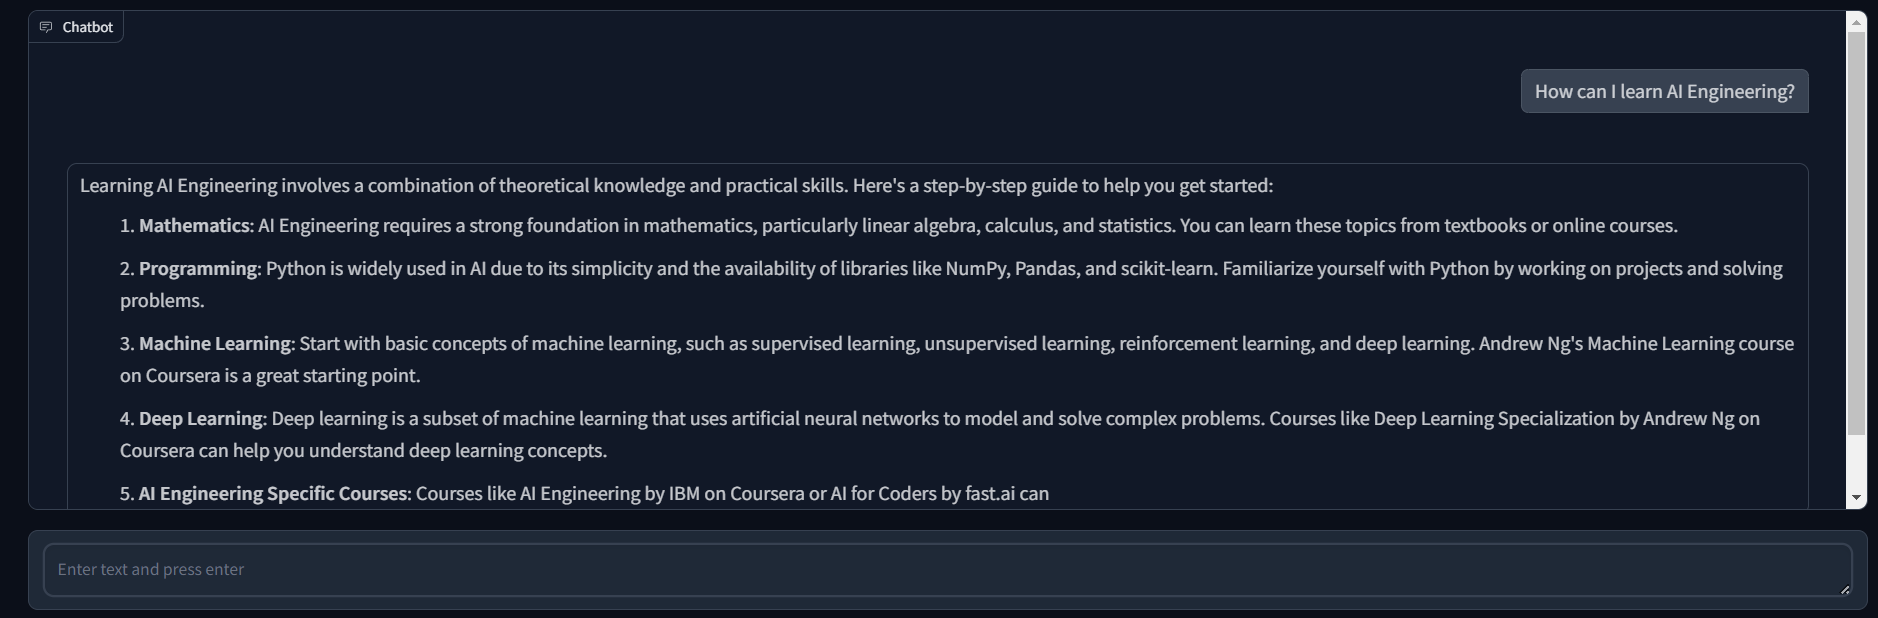

In [ ]:
!gradio deploy